<a href="https://colab.research.google.com/github/JosueAfouda/Customer-Churn/blob/master/Predicting_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PREDICTING CUSTOMER CHURN IN A TELECOM'S COMPANY**

*Author: Josué Afouda*

# Table of Contents
**[Introduction](#M0)** 

**[Libraries](#M1)**   

**[Data](#M2)** 

**[Exploratory Data Analysis](#M3)** 

**[Data Preprocessing](#M4)** 

**[Modelling](#M5)**

- [Logistic Regression](#M51)  
- [Random Forest](#M52)  
- [Artificial Neural Network](#M53) 
- [Deep Learning](#M54)

**[Conclusion](#M6)**

## <font color=#3876C2> Introduction</font> <a name="M0"></a>

Customer churn is when a customer decides to stop using services, content, or products from a company. There are many examples and use cases of customer churn: 
* Cancelled a service that is under contract
* Expiration of credit card       
* Left a service not under contract       
* Purchase from a different store          
* Etc.          

In competitive industries, where a business faces many competitors, the cost of new customer acquisition is even higher, and retaining existing customers becomes more important for such businesses. So, the company have to understand their customer's behavior better in order to retaining them. One way to do this is to build a machine learning model that can predict which customers are likely to churn and target and retain these specific customers that are at higher risk of churn. 

In this notebook, we will explore a dataset of a telecom's company and build a model to identify those customers with higher risk of churn for customer retention. We will use differents algorithms in order to compare performance of the models.

## <font color=#3876C2> Libraries</font> <a name="M1"></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import roc_curve, auc

Using TensorFlow backend.


## <font color=#3876C2> Data</font> <a name="M2"></a>

You can download the dataset from [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn/download) or from [GitHub](https://raw.githubusercontent.com/JosueAfouda/Customer-Churn/master/WA_Fn-UseC_-Telco-Customer-Churn.csv)
  Let's read the dataset in a pandas dataframe.

In [0]:
#Read the data
df = pd.read_csv('https://raw.githubusercontent.com/JosueAfouda/Customer-Churn/master/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
#Shape
df.shape

(7043, 21)

In [0]:
#Number of unique values for each column
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Since the 'customerID' has 7043 dinctinctes values, we are confident that each row of the dataset represent one customer.

In [0]:
print('The dataset contains', df.shape[0], 'rows (each row represent one customer) and', df.shape[1], 'columns')

The dataset contains 7043 rows (each row represent one customer) and 21 columns


In [0]:
#Missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We will deal with missing values later.

In [0]:
#Types of the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

One feature is of particular interest to us: 'Churn', which can take in two values - yes and no - indicating whether or not the customer has churned.                
Find the description of the variables [here](https://www.kaggle.com/blastchar/telco-customer-churn/data)

Now, let's make an exploratory data anlysis in order to understand the data.   

## <font color=#3876C2> Exploratory Data Analysis (EDA)</font> <a name="M3"></a>

Le's begin our EDA by plot the distribution of each feature.

In [0]:
#Categorical features
categorical_columns = df.nunique()[df.nunique() < 5].keys().tolist()

#Function to view the distribution of a categorical variable
def bar_plot(a):
  df[a].value_counts(normalize=True).plot(kind='bar')
  plt.ylabel('proportion')
  plt.title(print('Distribution of', a))
  return plt.show()

In [0]:
#Interact
interact(bar_plot, a = categorical_columns)

interactive(children=(Dropdown(description='a', options=('gender', 'SeniorCitizen', 'Partner', 'Dependents', '…

<function __main__.bar_plot>

We can interact with the notebook and view the distribution of each categorical variable. For example:                   
* There are more customers who dont't churned (more than 70%) than customers who churned (less than 30%).
* the distribution of the data across different genders is roughly equally distributed. 

* The number of elderly customers less than 20%) is much lower than that of young customers (more than 80%).

* *Partner* indicate whether the customer has a partner or not (Yes, No). Both categories are pratically the same proportion.

Let's repeat the same process for numerical features.

In [0]:
#Numerical features
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

#Function to view the distribution of a numerical variable
def hist_plot(b):
  sns.distplot(df[b])
  plt.title(print('Distribution of', b))
  return plt.show()

#Convert 'TotalCharges' as type float
df['TotalCharges'] = df['TotalCharges'].replace(' ',   
                             np.nan).astype(float)

In [0]:
#Interact
interact(hist_plot, b = numerical_columns)

interactive(children=(Dropdown(description='b', options=('tenure', 'MonthlyCharges', 'TotalCharges'), value='t…

<function __main__.hist_plot>

We have a comprehension of the distribution of each feature in our dataset. Now, let's make some bivariate analysis.

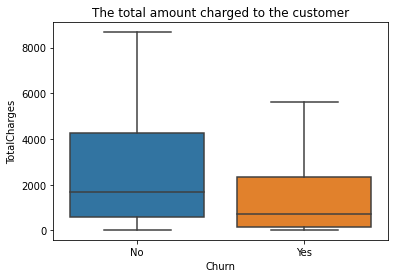

In [0]:
#TotalCharges VS Churn
sns.boxplot(x='Churn', y='TotalCharges', data=df, sym = "")
plt.title('The total amount charged to the customer')
plt.show()

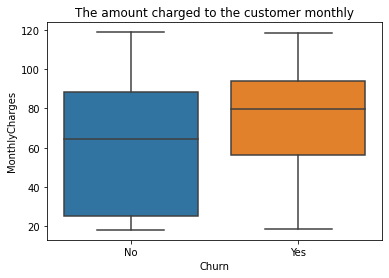

In [0]:
#MonthlyCharges VS Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, sym = "")
plt.title('The amount charged to the customer monthly')
plt.show()

The total amount charged to the customers who churned is smaller than the total amount charged to the customers who don't churned. But, the customers who churned are more charged montly than the customers who don't churned. This information  is very important for the company because the amont charged montly could be a important factor that determine whether a customer will churn or not.

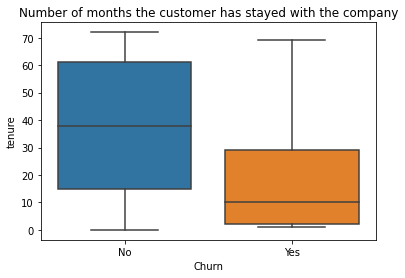

In [0]:
#MonthlyCharges VS Churn
sns.boxplot(x='Churn', y='tenure', data=df, sym = "")
plt.title('Number of months the customer has stayed with the company')
plt.show()

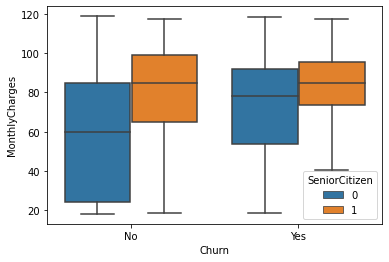

In [0]:
sns.boxplot(x = 'Churn',
            y = 'MonthlyCharges',
            data = df,
            sym = "",
            hue = "SeniorCitizen")

It seems that the elderly are billed more monthly than the young. Despite this, they remain more loyal to the company than young people.

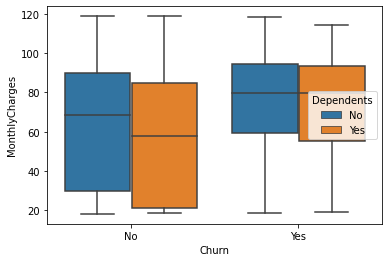

In [0]:
sns.boxplot(x = 'Churn',
            y = 'MonthlyCharges',
            data = df,
            sym = "",
            hue = "Dependents")

There is many other analyses that we can make. Let's jump into statistic resume.

In [0]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


As you can see from the summary statistics, the three tenure, MonthlyCharges, and TotalCharges continuous variables all have different scales. The tenure variable, ranges from 1 to 72, while the TotalCharges variable , ranges from 18.8 to 8684.8. Many of Machine and Deep Learning models perform better with scaled or normalized features.                  
We will deal with scaling data in the data preparation section.

## <font color=#3876C2> Data Preprocessing</font> <a name="M4"></a>

The first thing that we will do in order to prepare or data for modelling is encoding categorical variable.

In [0]:
#Encoding Binary variable
df['gender'] = df['gender'].apply(lambda row: 1 if row == 'Female' else 0)

binary_columns = df.drop('gender', axis=1).nunique()[df.drop('gender', axis=1).nunique() < 3].keys().tolist()
for column in binary_columns:
  df[column] = df[column].apply(lambda row: 1 if row == 'Yes' else 0)

#Encoding the remaining categorical variables
remaining_cat_vars = df[categorical_columns].nunique()[df[categorical_columns].nunique() > 2].keys().tolist()
remaining_cat_vars_dummies = pd.get_dummies(data = df[remaining_cat_vars], columns = remaining_cat_vars, drop_first=True)

#New dataframe
data = pd.concat([df['gender'], df[binary_columns], remaining_cat_vars_dummies, df[numerical_columns]], axis=1)

In [0]:
#Print data
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,29.85,29.85
1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,34,56.95,1889.50
2,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,53.85,108.15
3,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,45,42.30,1840.75
4,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,70.70,151.65


In [0]:
data.shape

(7043, 31)

Great Encoding! :)

Now, let's scale the *tenure*, *MonthlyCharges*, and *TotalCharges* variables.

In [0]:
#Scaling data
sc = StandardScaler()
scaled_numerical = sc.fit_transform(data[numerical_columns])

# Build a DataFrame from scaled_numerical
scaled_numerical = pd.DataFrame(scaled_numerical, columns=numerical_columns)

#Drop old numerical features from data
data.drop(numerical_columns, axis=1, inplace=True)

#Concat an print
data = pd.concat([data, scaled_numerical], axis=1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.277445,-1.160323,-0.994194
1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0.066327,-0.259629,-0.173740
2,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,-1.236724,-0.362660,-0.959649
3,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0.514251,-0.746535,-0.195248
4,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.236724,0.197365,-0.940457


In [0]:
data.shape

(7043, 31)

In [0]:
data.isna().sum()

gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
PhoneService                              0
PaperlessBilling                          0
Churn                                     0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                           0
StreamingMovies_No internet service       0
StreamingMovies_Yes             

Let's remove the missing values:

In [0]:
#Remove missing values
data.dropna(axis=0, inplace=True)

We have finished our data preprocessing. Let's jump into Modelling.

## <font color=#3876C2> Modelling</font> <a name="M5"></a>

We will build a classification model to predict whether or not a customer will churn. We will use differents algorithms in order to compare performance of the models: **Logistic Regression**, **Random Forest**, **Gradient Boosting** and **Artificial Neural Networks (ANN)**.              
Let's begin our modelling process by spliting data into training/Test set.

In [0]:
#Predictors
X = data.drop('Churn', axis=1)

#Target
y = data['Churn']

#Training/Test data (75%/25%)
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = seed)

### <font color=#FEB229> Logistic Regression Classifier Model</font> <a name="M51"></a>




In [0]:
#Dictionary of hyperparameters
param_grid = {'penalty':['l1', 'l2', 'elasticnet', None],
              'C':np.linspace(0.1, 2, 10),
              'fit_intercept':[True, False],
              'max_iter':range(100, 500, 50),
              'warm_start':[True, False]}

#Grid Search Object
grid_logreg_class = GridSearchCV(estimator = LogisticRegression(random_state=seed),
                                 param_grid=param_grid,
                                 scoring='accuracy',
                                 n_jobs=4,
                                 cv=10,
                                 refit=True,
                                 return_train_score=True)

#Train the model
logreg_model = grid_logreg_class.fit(X_train, y_train)

Since we set *refit* parameter to *True*, we can fit our grid search object that returns the best hyperparameters.

Now, let's see the best values of hyperparameters and the best score.

In [0]:
#Print best values of hyperparameters
print(logreg_model.best_params_)

#Evaluate the model
print(f'Train accuracy: {logreg_model.best_score_:.2f}')

{'C': 1.788888888888889, 'fit_intercept': False, 'max_iter': 100, 'penalty': 'l2', 'warm_start': True}
Train accuracy: 0.81


The model performs well on training data. Let's check if our model is generalizable.

In [0]:
#Using the best results
lr_preds = logreg_model.best_estimator_.predict(X_test)
print(f'Accuracy of the regression logistic model is {accuracy_score(y_test, lr_preds):.2f}')
logreg_precision, logreg_recall, logreg_fscore, _ = precision_recall_fscore_support(y_test, lr_preds, average='binary')
print(f'Precision: {logreg_precision:.2f}\nRecall: {logreg_recall:.2f}\nfscore: {logreg_fscore:.2f}')

Accuracy of the regression logistic model is 0.79
Precision: 0.62
Recall: 0.52
fscore: 0.57


With this accuracy on test data, we can say that our model perform well on the test set so it can be generalized.

Even if our model is quite good, it is not easily interpretable with all these 30 predictors. Let's wrap a [Recursive Feature Eliminator](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) (**RFE**) around our logistic regression classifier in order to see if it keeps the same performance if we reduce the number of predictors.

In [0]:
#Logistic Regression RFE
rfe_logreg_model = RFE(estimator=logreg_model.best_estimator_, verbose=1)
rfe_logreg_model.fit(X_train, y_train)

mask = rfe_logreg_model.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print(reduced_X.columns)

#Predict on Test set
rfe_logreg_model_preds = rfe_logreg_model.predict(X_test)

#Evaluation of RFE Logistic Regression model
print(f'Accuracy of the RFE regression logistic model is {accuracy_score(y_test, rfe_logreg_model_preds):.2f}')
rfe_logreg_precision, rfe_logreg_recall, rfe_logreg_fscore, _ = precision_recall_fscore_support(y_test, rfe_logreg_model_preds, average='binary')
print(f'Precision: {rfe_logreg_precision:.2f}\nRecall: {rfe_logreg_recall:.2f}\nfscore: {rfe_logreg_fscore:.2f}')

Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Index(['PhoneService', 'PaperlessBilling', 'MultipleLines_No phone service',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'tenure', 'TotalCharges'],
      dtype='object')
Accuracy of the RFE regression lo

The RFE reduced the number of predictors from 30 to 16 and the performance of this model is almost the same as the previous model. This shows not only the power of this function but also the importance of the selection of predictors to guard against overfitting. The models are thus easily interpretable.

Now, let's go for Random Forest Classifier.

### <font color=#FEB229> Random Forest (RF) Classifier</font> <a name="M52"></a>

In [0]:
#Import Random Forest
from sklearn.ensemble import RandomForestClassifier

#Dictionary of hyperparameters
param_grid_rf = {'n_estimators':[100, 500],
              'max_depth':[3, 5, 10],
              'max_features':['auto', 'sqrt', 'log2', None]}

#Grid Search Object
grid_rf_class = GridSearchCV(estimator = RandomForestClassifier(random_state=seed),
                                 param_grid=param_grid_rf,
                                 scoring='accuracy',
                                 n_jobs=4,
                                 cv=10,
                                 refit=True,
                                 return_train_score=True)

#Train the model
rf_model = grid_rf_class.fit(X_train, y_train)

Let's see the best values of hyperparameters and the best score.

In [0]:
#Print best values of hyperparameters
print(rf_model.best_params_)

#Evaluate the model
print(f'Train accuracy: {rf_model.best_score_:.2f}')

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 500}
Train accuracy: 0.80


The train accuracy is the same as for the logistic regression model. Let's compute some metrics on the test set.

In [0]:
#Using the best results
rf_preds = rf_model.best_estimator_.predict(X_test)
print(f'Accuracy of the Random Forest model is {accuracy_score(y_test, rf_preds):.2f}')
rf_precision, rf_recall, rf_fscore, _ = precision_recall_fscore_support(y_test, rf_preds, average='binary')
print(f'Precision: {rf_precision:.2f}\nRecall: {rf_recall:.2f}\nfscore: {rf_fscore:.2f}')

Accuracy of the Random Forest model is 0.79
Precision: 0.63
Recall: 0.48
fscore: 0.54


Compared to the values of the logistic regression model, the random forest model seems to be less efficient.

Let's make an RFE.

In [0]:
#Random Forest RFE
rfe_forest_model = RFE(estimator=rf_model.best_estimator_, verbose=1)
rfe_forest_model.fit(X_train, y_train)

mask_rf = rfe_forest_model.support_

# Apply the mask to the feature dataset X and print the result
rf_reduced_X = X.loc[:, mask_rf]
print(rf_reduced_X.columns)

#Predict on Test set
rfe_forest_model_preds = rfe_forest_model.predict(X_test)

#Evaluation of RFE Random Forest model
print(f'Accuracy of the RFE Random Forest model is {accuracy_score(y_test, rfe_forest_model_preds):.2f}')
rfe_forest_precision, rfe_forest_recall, rfe_forest_fscore, _ = precision_recall_fscore_support(y_test, rfe_forest_model_preds, average='binary')
print(f'Precision: {rfe_forest_precision:.2f}\nRecall: {rfe_forest_recall:.2f}\nfscore: {rfe_forest_fscore:.2f}')

Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Index(['gender', 'Dependents', 'PaperlessBilling', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'TechSupport_Yes',
       'StreamingMovies_No internet service', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check', 'tenure',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')
Accuracy of the RFE Random Forest model is 0.80
Precision: 0.

In view of these values, we will retain this random forest model obtained by RFE.

it is time to start building ANN models for customer churn predictions. So let's move onto the next section for ANN (Artificial Neural Network) modeling!

### <font color=#FEB229> Artificial Neural Network</font> <a name="M53"></a>

First, we will create a **Sequential model** here, which is the type of model where the layers are stacked linearly. The first layer is an input layer, where *input_dim* is simply the number of features or columns in the sample set and the number of output units is 16. We are using the **relu** activation function for this input layer. Then, in the hidden layer, the number of output units is 8 and the activation function to be used is relu. Lastly, the output layer has one output unit, which is the probability of customer churn, and we use the **sigmoid** activation function in this layer. 

(*We can experiment with different numbers of output units and activation functions*).

The final step to build a neural network model with the **keras** package is to compile this model. 

Let's go!

In [0]:
ann_model = Sequential()
ann_model.add(Dense(16, input_dim=X.shape[1], activation='relu'))
ann_model.add(Dense(8, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))
ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Now, let's train the model.

In [0]:
ann_model.fit(X_train, y_train, epochs=50, batch_size=100, verbose=0)

Now that we have built our first neural network model, let's evaluate its performance.

In [0]:
in_sample_preds = [round(x[0]) for x in ann_model.predict(X_train)]
out_sample_preds = [round(x[0]) for x in ann_model.predict(X_test)]

# Accuracy
print('In-Sample Accuracy: %0.2f' % accuracy_score(y_train, in_sample_preds))
print('Out-of-Sample Accuracy: %0.2f' % accuracy_score(y_test, out_sample_preds))

# Precision
print('Out-of-Sample Precision: %0.2f' % precision_score(y_test, out_sample_preds))

# Recall
print('Out-of-Sample Recall: %0.2f' % recall_score(y_test, out_sample_preds))

# fscore
print('Out-of-Sample fscore: %0.2f' % f1_score(y_test, out_sample_preds))

In-Sample Accuracy: 0.81
Out-of-Sample Accuracy: 0.79
Out-of-Sample Precision: 0.79
Out-of-Sample Recall: 0.53
Out-of-Sample fscore: 0.57


As you can see from this output, the accuracy of predicting whether a customer will churn or not in the test set is about 79%, suggesting the model is correct roughly about 80% of the time. The out-of-sample precision suggests that the model is correct about 62% of the time that it predicts that the customer is going to churn, and the out-of-sample recall suggests that the model captures roughly 52% of the churn cases. 

Let's increase the number of epochs and the number of hidden layers in order to try to improve the performance of the model.



### <font color=#FEB229> Deep Learning</font> <a name="M54"></a>

In [0]:
dl_model = Sequential()
dl_model.add(Dense(16, input_dim=X.shape[1], activation='relu'))
dl_model.add(Dense(10, activation='relu'))
dl_model.add(Dense(10, activation= "relu"))
dl_model.add(Dense(10, activation= "relu"))
dl_model.add(Dense(1, activation='sigmoid'))
dl_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train the model
dl_model.fit(X_train, y_train, epochs=100, batch_size=100, verbose=0)

In [0]:
#Evaluate the model
in_sample_predictions = [round(x[0]) for x in dl_model.predict(X_train)]
out_sample_predictions = [round(x[0]) for x in dl_model.predict(X_test)]

# Accuracy
print('In-Sample Accuracy: %0.2f' % accuracy_score(y_train, in_sample_predictions))
print('Out-of-Sample Accuracy: %0.2f' % accuracy_score(y_test, out_sample_predictions))

# Precision
print('Out-of-Sample Precision: %0.2f' % precision_score(y_test, out_sample_predictions))

# Recall
print('Out-of-Sample Recall: %0.2f' % recall_score(y_test, out_sample_predictions))

# fscore
print('Out-of-Sample fscore: %0.2f' % f1_score(y_test, out_sample_predictions))

In-Sample Accuracy: 0.83
Out-of-Sample Accuracy: 0.78
Out-of-Sample Precision: 0.61
Out-of-Sample Recall: 0.45
Out-of-Sample fscore: 0.52


In view of these values, we will retain the ANN model because the deep learning dont't increase the performance of the model.

Let's visualize the performance of ANN model To visualize by using ROC curve.

In-Sample AUC: 0.74
Out-Sample AUC: 0.71


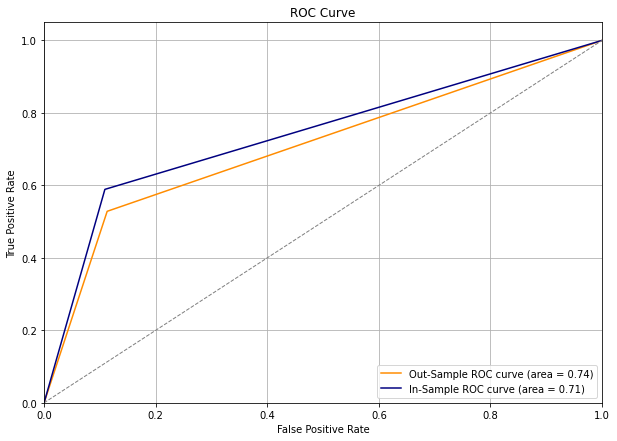

In [0]:
in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train, in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample_preds)

in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.2f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.2f' % out_sample_roc_auc)

#ROC curve
plt.figure(figsize=(10,7))

plt.plot(
    out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve (area = %0.2f)' % in_sample_roc_auc
)
plt.plot(
    in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.2f)' % out_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()

Along with the accuracy, precision, and recall measures that we looked at previously, the AUC and the ROC curve also suggest that the model captures and predicts those customers at churn risk pretty well. As you can see from these evaluation outputs, it is better to use the output of this model for identifying the customers who are likely to churn than simply guessing who they will be. By focusing on those customers with high churn probabilities from this model in your marketing strategies, you can try to retain those customers at churn risks in a more cost-effective way.

## <font color=#3876C2> Conclusion</font> <a name="M6"></a>

Here is the summary table of the performances of the different models:

In [0]:
models = ['Logistic Regression', 'RFE Logistic Regression', 'Random Forest', 'RFE Random Forest', 'Artificial Neural Network', 'Deep Learning']
Train_Accuracy = [round(logreg_model.best_score_, 2),
                  round(rfe_logreg_model.score(X_train, y_train), 2),
                  round(rf_model.best_score_, 2),
                  round(rfe_forest_model.score(X_train, y_train), 2),
                  round(accuracy_score(y_train, in_sample_preds), 2),
                  round(accuracy_score(y_train, in_sample_predictions), 2)]

Test_Accuracy = [round(accuracy_score(y_test, lr_preds), 2),
                 round(accuracy_score(y_test, rfe_logreg_model_preds), 2),
                 round(accuracy_score(y_test, rf_preds), 2),
                 round(accuracy_score(y_test, rfe_forest_model_preds), 2),
                 round(accuracy_score(y_test, out_sample_preds), 2),
                 round(accuracy_score(y_test, out_sample_predictions), 2)]

Precision = [round(precision_score(y_test, lr_preds), 2),
                 round(precision_score(y_test, rfe_logreg_model_preds), 2),
                 round(precision_score(y_test, rf_preds), 2),
                 round(precision_score(y_test, rfe_forest_model_preds), 2),
                 round(precision_score(y_test, out_sample_preds), 2),
                 round(precision_score(y_test, out_sample_predictions), 2)]

Recall = [round(recall_score(y_test, lr_preds), 2),
                 round(recall_score(y_test, rfe_logreg_model_preds), 2),
                 round(recall_score(y_test, rf_preds), 2),
                 round(recall_score(y_test, rfe_forest_model_preds), 2),
                 round(recall_score(y_test, out_sample_preds), 2),
                 round(recall_score(y_test, out_sample_predictions), 2)]

Fscore = [round(f1_score(y_test, lr_preds), 2),
                 round(f1_score(y_test, rfe_logreg_model_preds), 2),
                 round(f1_score(y_test, rf_preds), 2),
                 round(f1_score(y_test, rfe_forest_model_preds), 2),
                 round(f1_score(y_test, out_sample_preds), 2),
                 round(f1_score(y_test, out_sample_predictions), 2)]

In [0]:
#Summary
models_performances = pd.DataFrame({
                                    'Train Accuracy':Train_Accuracy,
                                    'Test Accuracy':Test_Accuracy,
                                    'Precision':Precision,
                                    'Recall':Recall,
                                    'Fscore':Fscore}, 
                                   index=models)

models_performances

,Train Accuracy,Test Accuracy,Precision,Recall,Fscore
Logistic Regression,0.81,0.79,0.62,0.52,0.57
RFE Logistic Regression,0.80,0.80,0.63,0.53,0.58
Random Forest,0.80,0.79,0.63,0.48,0.54
RFE Random Forest,0.87,0.80,0.65,0.49,0.56
Artificial Neural Network,0.81,0.79,0.62,0.53,0.57
Deep Learning,0.83,0.78,0.61,0.45,0.52


Great Job!

We have six (6) models to identify the customers who are at risk of churning. We have practically the same performance but we have to choose only one.